In [180]:
import pandas as pd
df = pd.read_csv('random_cpu_usage6.csv')
df.head()

,cpu_usage,memory_usage
0,0.1598,0.2184
1,0.4596,0.2698
2,0.1896,1.0088
3,0.3245,0.2542
4,0.5352,0.1212


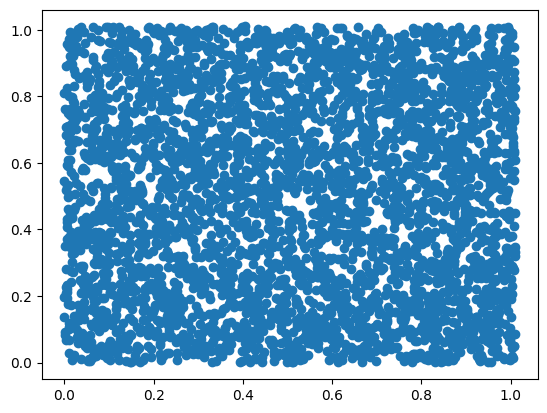

In [181]:
import matplotlib.pyplot as plt

plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

In [182]:
from sklearn.ensemble import IsolationForest

In [208]:
clf = IsolationForest(n_estimators=100,
    max_samples='auto',
    contamination=0.45,  # Adjust based on your estimate of the anomaly fraction
    max_features=1,
    random_state=42)
clf.fit(df)
prediction = clf.predict(df)

In [209]:
prediction

array([-1,  1, -1, ...,  1, -1, -1])

In [210]:
import numpy as np
index = np.where(prediction < 0)
index

(array([   0,    2,    5, ..., 3994, 3998, 3999], dtype=int64),)

In [211]:
x = df.values

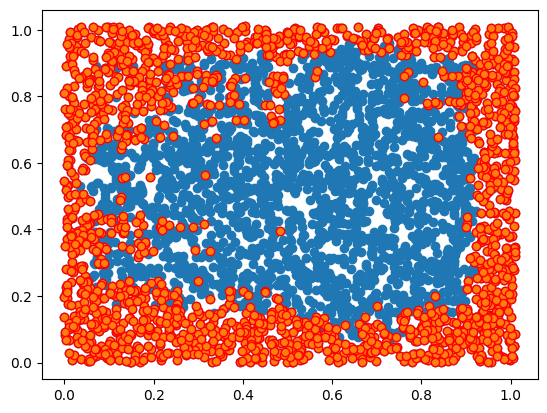

In [212]:
abn_ind = np.where(prediction < 0)
plt.scatter(df.iloc[:,0], df.iloc[:, 1])
plt.scatter(x[abn_ind, 0], x[abn_ind, 1], edgecolors='r')


In [214]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [215]:
df['anomaly_label'] = np.where(prediction < 0, 1, 0)

In [216]:
df

,cpu_usage,memory_usage,anomaly_label
0,0.1598,0.2184,1
1,0.4596,0.2698,0
2,0.1896,1.0088,1
3,0.3245,0.2542,0
4,0.5352,0.1212,0
...,...,...,...
3995,0.8822,0.6215,0
3996,0.9047,0.5895,0
3997,0.2702,0.5323,0
3998,0.0033,0.7079,1


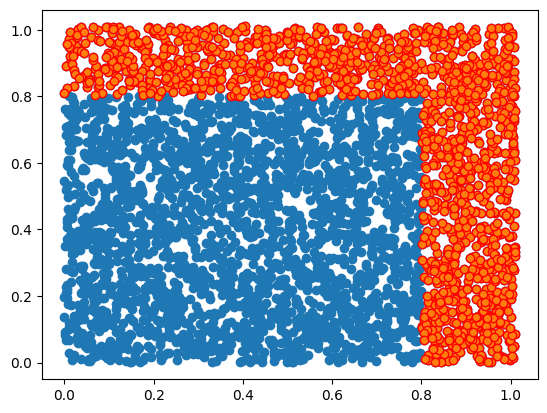

In [241]:
conditions = (df['cpu_usage'] > 0.8) | (df['memory_usage'] > 0.8)
df['anomaly_label'] = np.where(conditions, 1, 0)
abn_ind = np.where(df['anomaly_label'] > 0)

plt.scatter(df.iloc[:,0], df.iloc[:, 1])
plt.scatter(x[abn_ind, 0], x[abn_ind, 1], edgecolors='r')
plt.show()


In [224]:
x_train = df.drop('anomaly_label', axis=1)
y_train = df['anomaly_label']
x_test = x_train[3000:]
y_test = y_train[3000:]

x_train = x_train[:3000]
y_train = y_train[:3000]

In [225]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [246]:
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
 1/94 [..............................] - ETA: 0s - loss: 0.0155 - accuracy: 1.0000

94/94 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9940 - val_loss: 0.0234 - val_accuracy: 0.9930
Epoch 2/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9933 - val_loss: 0.0219 - val_accuracy: 0.9930
Epoch 3/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0334 - val_accuracy: 0.9810
Epoch 4/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9953 - val_loss: 0.0209 - val_accuracy: 0.9970
Epoch 5/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9870 - val_loss: 0.0203 - val_accuracy: 0.9960
Epoch 6/50
94/94 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9903 - val_loss: 0.0251 - val_accuracy: 0.9890
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9923 - val_loss: 0.0351 - val_accuracy: 0.9850
Epoch 8/50
94/94 [=============

In [247]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9930


[0.018092384561896324, 0.9929999709129333]

In [253]:
model.predict([[0.80, 0.8056]])

1/1 [==============================] - 0s 39ms/step


array([[0.88666564]], dtype=float32)